In [79]:
#Data collection, save in CSV file
import tweepy
import csv
import time
from datetime import datetime
from datetime import timedelta
import json


consumer_key = "wJvckQyRGO9j6IP1HLEqKHy2T"
consumer_secret = "vgActfGgy0UCGR5OGSGRNPiX75jIeXlNGpTtFsqStVjIY6EiIR"
access_token = "150884743-9FLqDlzvx6FFxZvhms2m4CItsFR2ANcJR4liz1HI"
access_token_secret = "Epn0ZK4uF13BMEkyIZqk7KToeXkymOl7yVG5gCNutRsFQ"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

yesterday = (datetime.now() + timedelta(days=-1)).strftime("%Y-%m-%d")
csvFile = open('IMUNISASI/imunisasi_tweet_'+yesterday+'.csv', 'a')
csvWriter = csv.writer(csvFile)

data = []
jsonFile = 'IMUNISASI/imunisasi_tweet_'+yesterday+'.JSON'

for tweet in tweepy.Cursor(api.search,q="'imunisasi OR vaksin OR vaksinasi' -filter:retweets",count=10000,lang="id",since=yesterday,tweet_mode='extended').items():
                
    if(tweet.created_at.date() < datetime.now().date()) :
        #Write in CSV file 
        '''csvWriter.writerow([tweet.id,
                            tweet.created_at,
                            tweet.full_text.encode('utf-8'),
                            tweet.user.time_zone,
                            tweet.place, 
                            tweet.coordinates,
                            tweet.user.location.encode('utf-8'),
                            tweet.user.name.encode('utf-8'),
                            tweet.user.screen_name.encode('utf-8'),
                            tweet.retweet_count,
                            tweet.favorite_count
                           ])'''
        #Write in JSON file
        data.append({
            'id':tweet.id,
            'screen_name':tweet.user.screen_name,
            'text':tweet.full_text
                    
        })
        
with open(jsonFile, 'w') as outfile:
    json.dump(data, outfile,indent = 4)

In [121]:
#emoji extract
import emoji
import regex as regex
import re

#emoji free text
emoji_pattern = re.compile("["
                           r"\U0001F600-\U0001F64F"  # emoticons
                           r"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           r"\U0001F680-\U0001F6FF"  # transport & map symbols
                           r"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           r"\U00002702-\U000027B0"
                           r"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def clean_tweets(tweet):
    
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = re.sub(r'[^\x00-\x7F]+','', tweet)
    #tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    #tweet = re.sub(r'\b(?:(?:https?|ftp)://)?\w[\w-]*(?:\.[\w-]+)+\S*','',tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\n',' ',tweet)
    tweet = re.sub(r'\d', '', tweet)
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    tweet = re.sub(url_pattern, '', tweet)
    tweet = re.sub(r'https//', '', tweet)
    tweet = re.sub(r'&amp;', '&', tweet)
    tweet = re.sub(r'\s+', ' ', tweet) # standardize white space
    #tweet = re.sub(r'&amp;','', tweet)
    tweet = emoji_pattern.sub(r'', tweet)
    #remove = string.punctuation
    #tweet = ' '.join(word.strip(remove) for word in tweet.split())

    return tweet

def extract_emojis(a_list):
    emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
    r = re.compile('|'.join(re.escape(p) for p in emojis_list))
    aux=[','.join(r.findall(s)) for s in a_list]
    return(aux)

clean_tweet = []
jsonCleanText = 'IMUNISASI/imunisasi_tweet_clean_'+yesterday+'.JSON'
hashtags = []
jsonCleanHashtags = 'IMUNISASI/imunisasi_tweet_hashtags_'+yesterday+'.JSON'
txt_list = []
jsonExtractEmoji = 'IMUNISASI/imunisasi_tweet_emoji_'+yesterday+'.JSON'
with open('IMUNISASI/imunisasi_tweet_'+yesterday+'.JSON') as data_file: #Read JSON File
    data = json.load(data_file)
    for i in data:
        #print(i['text'])
        #Hashtag Extract
        ht = re.findall(r"#(\w+)", i['text'])
        hashtags.append(ht)
        
        #Clean Text Extract
        tweet = clean_tweets(i['text'])
        txt = i['text']
        txt_list.append(txt)
        #emo = emojiXtract(i['text'])
        #emoji.append(emo)
        clean_tweet.append({
            'id':i['id'],
            'text':tweet
        })
emojis = extract_emojis(txt_list)
emoji = []
#WRITE To File
with open(jsonCleanText, 'w') as outfile:
    json.dump(clean_tweet, outfile,indent = 4)
with open(jsonCleanHashtags, 'w') as outfile:
    json.dump(hashtags, outfile,indent = 4)
    
for i in emojis:
        if i!="":
            emoji.append(i)
     
#emoji_all = ','.join(emo for emo in emoji)
#print(emoji_all)
with open(jsonExtractEmoji, 'w') as outfile:
    json.dump(emoji, outfile,indent = 4)

['selautersenyum', 'selalubersyukur', 'selalubahagia', 'selaluberdoa', 'edisisakit', 'fun', 'smile', 'pretty', 'kochengoren', 'HanyaDiYogya', 'YOGYAGROUP', 'Vaksin', 'eirenetheresapriyanto', 'eirene', 'daughter', 'SahabatImun', 'IMUNinfo', 'AyoImunisasi', 'InfoImunisasi', 'vaccines', 'IMUNinfowork', 'vaccine', 'LindungiHebatmu', 'KelompokImunitas', 'HerdImmunity', 'BersamaTerlindungi', 'Parenting', 'Imunisasi', 'FunFacts', 'SDMUnggulIndonsiaMaju', 'infokesehatan', 'uptpkmpadasuka', 'siapmelayanidenganhati', 'Paripurna164', 'Blog', 'HappyBlogging', 'Paripurna164', 'FMTNews', 'vaksin', 'imunisasi', 'balimedikaclinic', 'balimedika', 'noblame', 'noshame', 'vaccines', 'influenzavaccine', 'GerakanNasionalBudayaNusantara', 'BangkitBudayaNusantara', 'TolakPenjajahanBudaya', 'NusantaraBukanKhilafah']


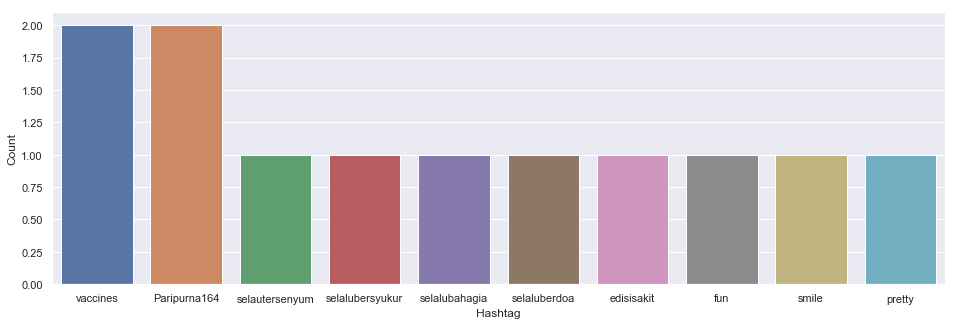

In [120]:
#VIEW HASHTAG 
hashtags=[]
with open('IMUNISASI/imunisasi_tweet_hashtags_'+yesterday+'.JSON') as data_file: #Read JSON File
    data = json.load(data_file)
    for i in data:
        if i!="":
            hashtags.append(i)
      
HT_all = sum(hashtags,[])
print(HT_all)
#show bar plot
a = nltk.FreqDist(HT_all)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [125]:
#VIEW EMOJI 
emoji=[]
with open('IMUNISASI/imunisasi_tweet_emoji_'+yesterday+'.JSON') as data_file: #Read JSON File
    data = json.load(data_file)
    for i in data:
        #if i!="":
            emoji.append(i)
     
emoji_all = ','.join(emo for emo in emoji)
print(emoji_all)



😂,🤭,😭,😭,😭,😭,🤔,😘,😭,😃,👍,☹,☹,☹,☹,💜,☹,😖,😩,😭,😭,😭,😞,😭,😭,😶,👍,☺,🥺,👧,🏻,😭,😭,😭,😭,😭,😭,😭,😭,🙏,🙏,👌,🙃,❤,❤,❤,🙂,🙂,🤣,😂,🥰,🙂,😂,✅,✅,✅,✅,👧,👩,😂,👧,👩,😂,😆,🤣,😅,👏,🏼,👏,🏼,👏,🏼,😓,🤣,🤣,😂,😪,😁,🙄,😏,😏,😍,🙈,😂,🤦,🏼,♀,😂,😊,👌


In [128]:
#VISUALISASI
#WORD CLOUD
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(max_font_size=50, background_color='white').generate(emoji_all)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud(emoji_all)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
import pandas as pd
import nltk
from nltk.stem.porter import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from googletrans import Translator
translator = Translator()

In [ ]:
#MENAMBHAKAN SENTIMEN VADER
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [ ]:
import seaborn as sns
def anl_tweets(lst, title='Tweets Sentiment', engl=False ): #engl = False karena pake bahasa indonesia
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

In [ ]:
#ANALYZE: sentimen vader , tambah kolom sent_vader
df['sent_vader'] = anl_tweets(df.text)